In [48]:
import math
import os
import sys
import argparse

import pandas as pd
import numpy as np

sys.path.append('../..')

from src.IO.IO import IO
from src.util import get_config

%matplotlib inline
import matplotlib.pyplot as plt
from src.prg.prg.prg import create_prg_curve, plot_prg, calc_auprg, plot_pr
plt.rcParams['figure.figsize'] = (8,7)

In [49]:
# absolute path to the config folder
path = "../../src/config_files/"
cfg_filename = "config_lbds.yaml"
fn = path + '/' + cfg_filename
if os.path.exists(fn):
    cfg = get_config(fn)
else:
    print("Config file {} couldn't be found at {}, exiting".format(args.configfn, fn))
    exit()

Reading config file


In [50]:
import util

io = IO(cfg, 'pipeline')
ad = cfg["pipeline"]["anomaly_detection"]["anomaly_detector"]
machine = cfg["machine"]

# get filenames
stats_path = util.RESULTS_DIR + "/statistics/multiple_pipelines/{}/{}/{}/".format(ad, io.machine.lower(), io.start_year)
filename = "all_single_features_res_2021-08-12 12:29:49.924736.csv"
filename_random = 'all_single_features_res_2021-08-13 06:25:44.234906.csv'
filename_all_features = 'grid_search_statistics_multiple_pipelines_lbds_2016_B2_16_iforest_res-practical_recall-test.csv'

results = []
results.append(io.read_csv(filename, stats_path))
results.append(io.read_csv(filename_random, stats_path))


all_features_data = io.read_csv(filename_all_features, stats_path)
d = {'selected_features': ['all features'],
     'auc': all_features_data['auc'].mean(),
    'rank': all_features_data['rank'].mean(),
    'practical_recall': all_features_data['practical_recall'].mean(),
    'auprg': all_features_data['auprg'].mean()}
d = pd.DataFrame(d)
results.append(d)

Reading all_single_features_res_2021-08-12 12:29:49.924736.csv file
Reading all_single_features_res_2021-08-13 06:25:44.234906.csv file
Reading grid_search_statistics_multiple_pipelines_lbds_2016_B2_16_iforest_res-practical_recall-test.csv file


Saving figure at /home/thomas/Documents/git/anomaly-detection-abt-equipment/notebooks/LBDS/../../src/IO/../../results/experiments/figures/iforest/2016/01-01/B2/
Saving figure at /home/thomas/Documents/git/anomaly-detection-abt-equipment/notebooks/LBDS/../../src/IO/../../results/experiments/figures/iforest/2016/01-01/B2/
Saving figure at /home/thomas/Documents/git/anomaly-detection-abt-equipment/notebooks/LBDS/../../src/IO/../../results/experiments/figures/iforest/2016/01-01/B2/
Saving figure at /home/thomas/Documents/git/anomaly-detection-abt-equipment/notebooks/LBDS/../../src/IO/../../results/experiments/figures/iforest/2016/01-01/B2/


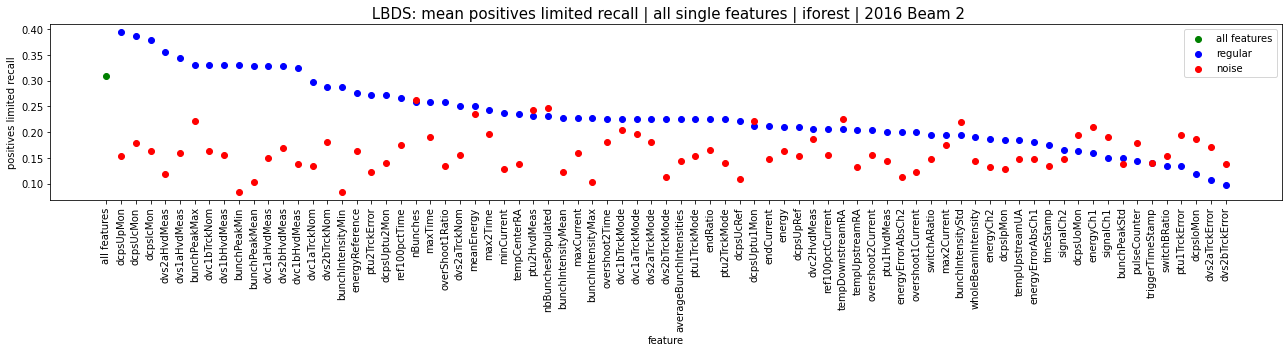

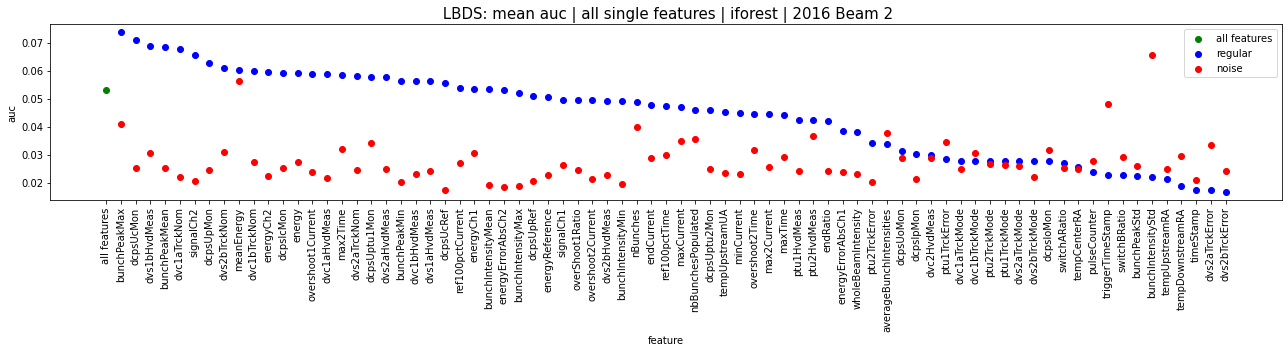

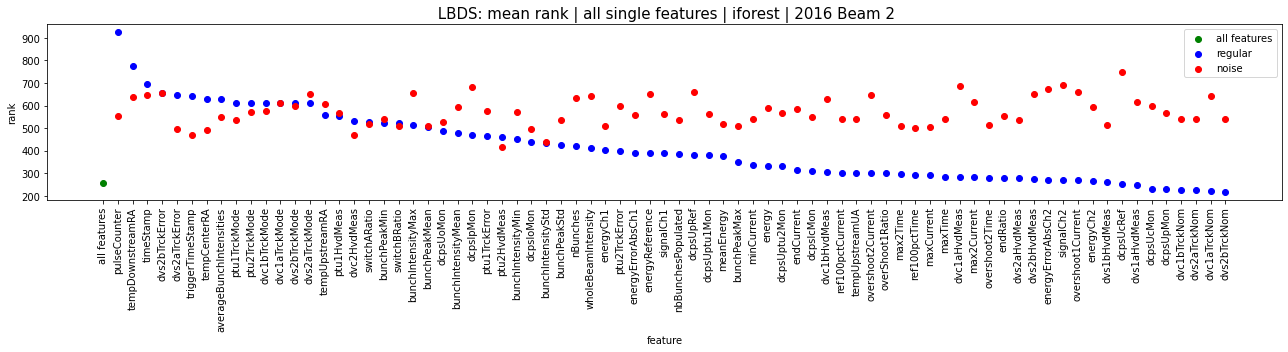

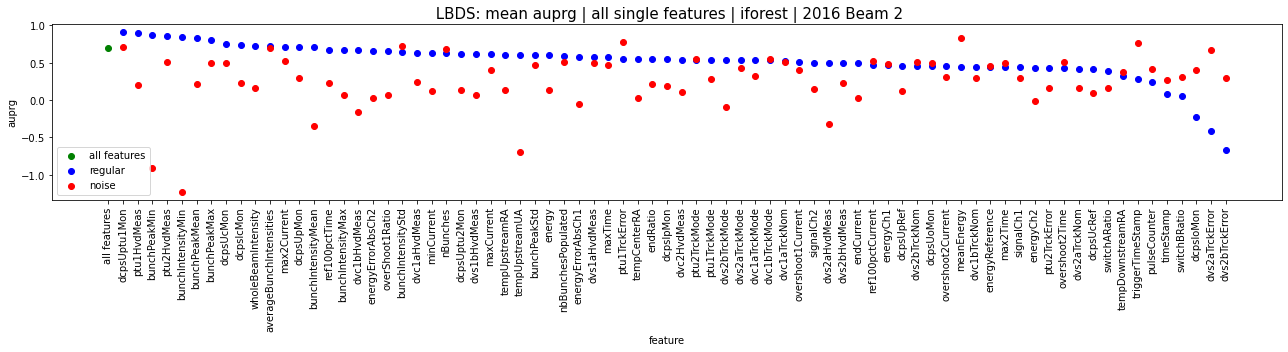

In [51]:

#plot
metrics_to_plot = ['practical_recall', 'auc', 'rank', 'auprg']
save_figures = True
colors = ['b-o']
e_colors = ["#045EDB"]

# remove failed pipelines
features_that_failed = ['effectiveToleranceCh1', 
                        'effectiveToleranceCh2',
                       'dvc1bTrckError',
                       'dvc1aTrckError',
                       'humidityAmbientUA',
                       'filledBuckets',
                       'dcpsUoRef',
                       'dcpsIcRef',
                       'dcpsUptu1Ref',
                       'dcpsUptu2Ref']
for i in range(2):
    for f in features_that_failed:
        results[i] = results[i][results[i]['selected_features'] != f]

for metric_to_plot in metrics_to_plot:
    results[0] = results[0].sort_values(by=[metric_to_plot], ascending=False)
    #results[1] = results[1].sort_values(by=[metric_to_plot], ascending=False)
    plt.figure(figsize=(18, 5), facecolor='white', edgecolor='white')
    plt.scatter(results[2]['selected_features'], results[2][metric_to_plot], marker='o', linestyle='-', color='g')
    plt.scatter(results[0]['selected_features'], results[0][metric_to_plot], marker='o', linestyle='-', color='b')
    plt.scatter(results[1]['selected_features'], results[1][metric_to_plot], marker='o', linestyle='-', color='r')
    if metric_to_plot == "practical_recall":
        metric_to_plot = 'positives limited recall'
    plt.title(
        " {}: mean {} | all single features | {} | {} Beam {}".format(machine, metric_to_plot, ad, io.start_year, io.beam),
        fontsize=15)
    plt.xlabel("feature")
    plt.xticks(rotation='vertical')
    plt.ylabel(metric_to_plot)
    plt.legend(['all features', 'regular', 'noise'])
    plt.tight_layout()
    if save_figures:
        prefix = "{}_{} all single features".format(machine, metric_to_plot)
        filename = '{}_{}.png'.format(prefix, ad)
        fig_path = io.get_figures_path(ad)
        io.save_figure(plt, fig_path, filename)
plt.show()